# Week 1-6 Code Review

<img src="https://www.bufa.ca/wp-content/uploads/2015/11/BUFA-Time-for-Review.jpg" width=600>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as so
import scipy.stats as ss

from IPython.display import display
from sklearn.datasets import load_linnerud, load_boston, load_breast_cancer
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

## Part 1: OLS (L2), LAD (L1) Fitting

$$Loss_{L1} = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

$$Loss_{L2} = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$

b-predicted: [5. 2.]
R-squared: 1.0


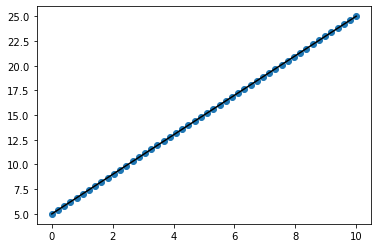

In [2]:
# create some data
x = np.linspace(0,10,50)
y = 2*x + 5
plt.scatter(x,y)

# create design matrix
X = np.c_[np.ones(len(x)),x]

# define LAD loss, fit
def lad_loss(b,X,y):
    lad = np.sum(np.abs(y-np.dot(X,b)))
    return lad

def lad_fit(X,y):
    b_pred = so.minimize(lad_loss,np.ones((2,1)),args=(X,y)).x
    return b_pred

# get predictions for b
bpr = lad_fit(X,y)
print(f"b-predicted: {bpr}")

# plot the prediction on "new" x data
xx = np.linspace(0,10,100)
XX = np.c_[np.ones(len(xx)),xx]
ypr = np.dot(XX, bpr)
plt.plot(xx,ypr, color='black')

# ****CORRECTION**** 
# I was using ypr in calculating R-squared (which is our prediction on "new" data). R2 is typically a measure of "fit" to
# the training data and not of "prediction" on unseen data. The correction: use np.dot(X,b) to get the residual for our fit
# Why? X is the design matrix containing our training data (data we're fitting to), b are our coefficients (after the fit),
# and np.dot(X,b) is our model's fit to the training data. R-squared has been corrected in the rest of part 1 as well.

R2 = lambda y, X, b: 1-(np.sum((y-(np.dot(X,b)))**2))/np.sum((y-np.mean(y))**2) 
print(f"R-squared: {R2(y,X,bpr)}")

b-predict: [5. 2.]
R-squared 1.0


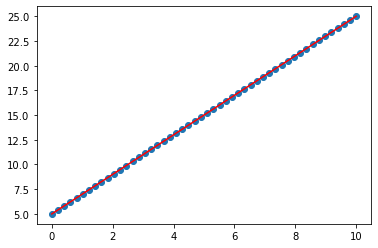

In [3]:
# L2 with sklearn

# since X has column of 1's, set fit_intercept=False
lin = LinearRegression(fit_intercept=False).fit(X,y)
print(f"b-predict: {lin.coef_}")

# .score gets the R-squared value for your fit 
print(f"R-squared {lin.score(X,y)}")

# or we can use our lambda function to get R-squared
#print(f"R-squared: {R2(y,X,lin.coef_)}")

ypr2 = lin.predict(XX)
plt.scatter(x,y)
plt.plot(xx,ypr2, color='red')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


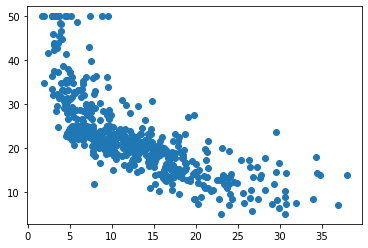

In [4]:
# let's look at some more data
data = load_boston()
#display(data)

df = pd.DataFrame(data['data'])
df.columns=[data['feature_names']]
df['house_price']=data['target']
display(df)

# we'll consider LSTAT vs house price only
plt.scatter(df.LSTAT, df.house_price)

b-predicted: [31.46085394 -0.8252745 ]
R-squared: 0.507600659017788


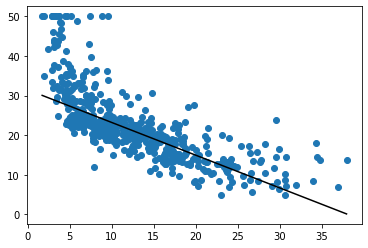

In [5]:
# get data into x,X,y
x = df.LSTAT.values
X = np.c_[np.ones(len(x)),x]
y = df.house_price.values.reshape(-1)

# get prediction for b
bpr = lad_fit(X,y)
print(f"b-predicted: {bpr}")
print(f"R-squared: {R2(y,X,bpr)}")

# plot the prediction on "new" x data
xx = np.linspace(min(x),max(x),len(x))
XX = np.c_[np.ones(len(xx)),xx]

ypr = np.dot(XX, bpr)
plt.scatter(x,y)
plt.plot(xx,ypr, color='black')

b-predict: [34.55384088 -0.95004935]
R-squared: 0.5441462975864797


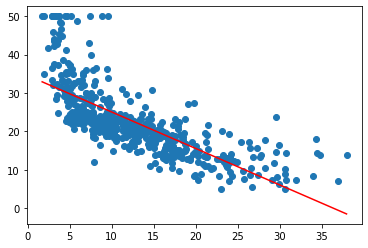

In [6]:
# L2 with sklearn
lin = LinearRegression(fit_intercept=False).fit(X,y)
print(f"b-predict: {lin.coef_}")
print(f"R-squared: {R2(y,X,lin.coef_)}")

ypr2 = lin.predict(XX)
plt.scatter(x,y)
plt.plot(xx,ypr2, color='red')

## Part 2: Max. Likelihood Regression

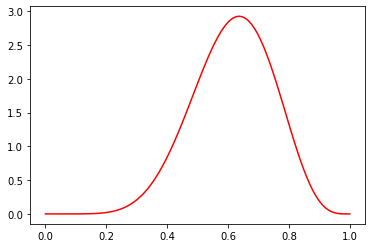

In [7]:
# Consider the beta distribution: https://en.wikipedia.org/wiki/Beta_distribution
A = 8; B = 5
x = np.linspace(0,1,100)
plt.plot(x, ss.beta.pdf(x, A, B), 'r-')

In [8]:
# Let's consider the Graduate Admission Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions

df = pd.read_csv("adm.csv")
df.columns = ['SN','GRE', 'TOEFL', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit_Chance']
display(df.head())

# "manual feature selection" --> remove Student Number
df = df.drop('SN',axis=1)

,SN,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Let's perform Beta Likelihood Regression...

#### Given 1:

We can parametrize the distribution in terms of the mean $\mu \in (0,1)$ and a "concentration" $\phi > 0$, where

$$A = \mu \cdot \phi$$
$$B = (1 - \mu) \cdot \phi$$

#### Given 2:

For our function form we will consider $\varsigma(\mathbf{Xb})$ as our function form. We will set $\mu = \varsigma(\mathbf{Xb})$. Why this function? We need a function which maps X and b to (0,1)

In [9]:
def pred(X,b):
    pred = 1.0 / (1+np.exp(-(X@b)))
    return pred

def betaloglik(y,mu,phi):
    A = mu*phi 
    B = (1-mu)*phi
    return ss.beta.logpdf(y, A, B).sum()

# We have 2 parameters now instead of typical 1
def betaregnegloglik(theta,X,y):
    # theta contains phi followed by beta. phi is a nuisance variable here.
    phi = theta[0]
    b_vals = theta[1:]
    mu = pred(X, b_vals) # Use our predict function
    return -1*betaloglik(y, mu, phi) 

# Test what we have so far...
X = np.array([[1,2],[1,3],[1,4]])
b = np.array([[1],[-1]])
y = np.array([[0.2],[0.4],[0.6]])

phi = np.array([[10]]) # Makes phi a 1 by 1 array
testtheta = np.r_[phi,b] # Stack phi on top of b to get theta
betaregnegloglik(testtheta,X,np.array([0.2,0.4,0.6])) # Compute

16.50271105637038

In [10]:
# Let's now compute the b coefficients
def betaregmaximumlikelihood(X,y):
    phistart = np.ones((1,1))
    bstart = np.zeros((X.shape[1],1))
    thetastart = np.r_[phistart, bstart]
    optimization = so.minimize(betaregnegloglik, x0=thetastart, args = (X,y), method = 'Nelder-Mead')
    results = optimization.x # Get the "theta" vector back
    phi = results[0] # phi is first element
    b = results[1:] # b is rest
    return (b,phi)

(n,m) = df.shape
X = np.c_[np.ones((n,1)),df.drop('Admit_Chance', axis='columns').values]
y = df.Admit_Chance

b, phi = betaregmaximumlikelihood(X,y)
print("b=",b)
print("phi=",phi)

# So, for a given input...
X = np.c_[1, 337,118,4,4.5,4.5,9.65,1]
ypr = pred(X,b)
print(ypr)

b= [-0.22011089 -0.02230202  0.03366428  0.29826795  0.1006181  -0.10995954
  0.44583928 -0.02397809]
phi= 22.467857101105572
[0.84102855]


## Part 3: Bootstrapping a Prediction

,Chins,Situps,Jumps,weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0
5,4.0,101.0,42.0,182.0
6,8.0,101.0,38.0,211.0
7,6.0,125.0,40.0,167.0
8,15.0,200.0,40.0,176.0
9,17.0,251.0,250.0,154.0


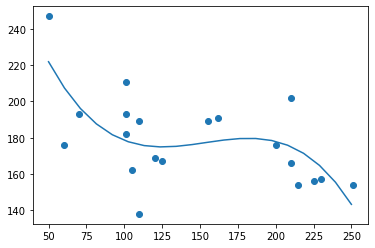

In [11]:
# Import data for the bootstrap
dataset = load_linnerud()
#print(dataset)

# Format it into a dataframe
df1 = pd.DataFrame(dataset['data'])
df1.columns=[dataset['feature_names']]
df1['weight']=dataset['target'][:,0]
display(df1)

# Let's consider Situps vs. weight
x = df1.Situps
y = df1.weight
plt.scatter(x,y)

# Create our design matrix X
X = np.c_[np.ones(len(x)),x,x**2,x**3]

# Fit a linear model to our data
lin3 = LinearRegression().fit(X,y)

# Create new xdata and design matrix
xnew = np.linspace(50,250,20)
Xnew = np.c_[np.ones(len(xnew)),xnew,xnew**2,xnew**3]

# Predict on the new X design matrix
yp3 = lin3.predict(Xnew)
plt.plot(xnew,yp3)

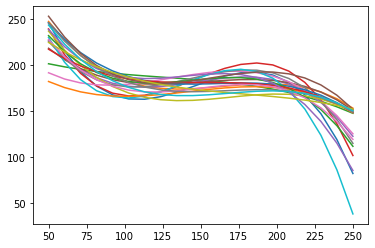

In [12]:
# Write a function to bootstrap our model predictions
def boot(S):
    num_iterations = 1000    
    sample_size = len(S)
    
    # size is 1000 x 20 since we have 1000 bootstrap samples of length 20 (20 y-points)
    boot_ypr = np.zeros((1000,20))

    for i in range(num_iterations):
        #create bootstrap sample
        S_star = S.sample(sample_size, replace=True)

        # create design matrix from bootstrap sample
        Sx = S_star.Situps.values.reshape(-1)
        SX = np.c_[np.ones(Sx.shape[0]), Sx, Sx**2, Sx**3]
        Sy = S_star.weight.values.reshape(-1)
        
        Slin = LinearRegression()
        Slin.fit(SX,Sy)
        
        xx = np.linspace(50, 250, 20)
        XX = np.c_[np.ones(len(xx)),xx,xx**2,xx**3]
        yy = Slin.predict(XX)
        boot_ypr[i,:] = yy

    return boot_ypr

# Plot your 20 Boostrap predictions here
boot_ypr = boot(df1)
xx = np.linspace(50, 250, 20)

for i in range(20):
    plt.plot(xx, boot_ypr[i,:])

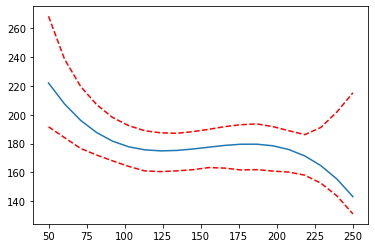

In [13]:
# Get a 95% Confidence Interval

# Create lower and upper quantiles using np.quantile. Plot your CI
lower = np.quantile(boot_ypr - yp3.reshape(-1), 0.025, axis=0) #axis=0 refers to rows
upper = np.quantile(boot_ypr - yp3.reshape(-1), 0.975, axis=0)

#plot prediction
plt.plot(xx, yp3.reshape(-1))

#plot confidence interval (from bootstrap)
plt.plot(xx, yp3.reshape(-1) - upper, 'r--')
plt.plot(xx, yp3.reshape(-1) - lower, 'r--')

## Part 4: Classification and Evaluation

In [14]:
# First, let's load the classification dataset from sklearn
data4 = load_breast_cancer()
#print(data4)

# Let's now format the dataset
df4 = pd.DataFrame(data4['data'])
df4.columns=[data4['feature_names']]
df4['CLASS']=data4['target']
display(df4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,CLASS
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
# Let's consider logistic regression with no regularization

M1 = Pipeline([
    ('logr', LogisticRegression(penalty="none", max_iter=10000))
])

X = df4.drop(["CLASS"],axis=1)
y = df4.CLASS.values.reshape(-1)

# We'll train on the whole dataset, then check coef/intercept
M1.fit(X,y)
print(M1.named_steps["logr"].coef_)
print(M1.named_steps["logr"].intercept_)

# Is this test accuracy optimistic? Why?
print(f"Accuracy: {accuracy_score(y, M1.predict(X))}")

# The test accuracy here is optimistic because the model is predicting from the same set it was trained on.
# This is often referred to as "Double-Dipping". We want our models to make predictions on "unseen" data

/Users/dongbochen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


[[ 3.74978467e+00 -1.18660669e-01  3.67973478e-01 -4.84118885e-02
  -2.05246730e+01  8.32195687e+00 -1.95432848e+01 -3.83579635e+01
  -4.93927285e+00  4.77646317e+00  2.05941622e+00  2.55846948e+00
   1.29657316e+00 -3.69607829e-01 -4.01788550e+00  3.71107737e+01
   4.61313234e+01 -2.40004725e+00  8.86078549e+00  6.71018636e+00
  -2.75200010e+00 -5.38825148e-01 -1.78760440e-01  1.63563356e-02
  -4.42679865e+01  1.42464738e+01 -1.38648155e+01 -6.73032266e+01
  -1.29844186e+01  4.21199329e+00]]
[34.69423161]
Accuracy: 0.9824253075571178


## Part 5,6: Cross-Validation, Regularization

In [16]:
# Let's consider Logistic regression with L2 regularization: 
M2 = Pipeline([
    ('scl2', StandardScaler()),
    ('logr2', LogisticRegression(penalty="l2", C=1))
])

# We'll split our data into a training set and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Now, let's determine an optimal hyperparameter (regularization coef.)
# We'll use 10-fold Cross-Validation here to compare the models
# Alternate: we could use StratifiedKFold as classes not balanced #kf = StratifiedKFold(10)
# Another alternate --> we could use GridSearchCV instead of manually running a Grid Search

lam = np.exp(np.linspace(-1,1,50))
errs = np.zeros(len(lam))\

for i in range(len(lam)):
    M2.set_params(logr2=LogisticRegression(C=lam[i], penalty='l2'))
    cvsc = cross_val_score(M2, Xtrain, ytrain,cv=10,scoring = 'neg_log_loss')
    errs[i] = cvsc.mean()
    print(f"C-value (1/lam): {lam[i]} | nll: {errs[i]}")

C-value (1/lam): 0.36787944117144233 | nll: -0.08262189092238967
C-value (1/lam): 0.3832055792088429 | nll: -0.08217521243928358
C-value (1/lam): 0.3991702158434836 | nll: -0.08174373829128823
C-value (1/lam): 0.41579995141379833 | nll: -0.08132712232822653
C-value (1/lam): 0.4331224944486033 | nll: -0.08092617296083857
C-value (1/lam): 0.4511667078351541 | nll: -0.08054017649513359
C-value (1/lam): 0.4699626569105979 | nll: -0.08016959042763827
C-value (1/lam): 0.4895416595569531 | nll: -0.07981511256042297
C-value (1/lam): 0.5099363383830838 | nll: -0.07947724074054355
C-value (1/lam): 0.5311806750806151 | nll: -0.07915540912550026
C-value (1/lam): 0.5533100670443569 | nll: -0.07884954840898448
C-value (1/lam): 0.5763613863515785 | nll: -0.07856056244817111
C-value (1/lam): 0.6003730411984044 | nll: -0.0782886786502523
C-value (1/lam): 0.6253850398956967 | nll: -0.07803354613322325
C-value (1/lam): 0.6514390575310556 | nll: -0.0777955803489766
C-value (1/lam): 0.6785785054080089 | nl

Optimal lambda: 1.0631375509322778


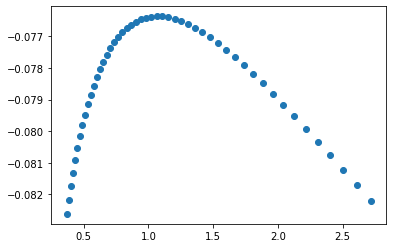

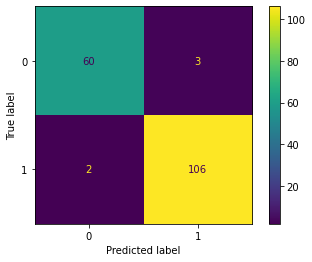

Precision: 0.9724770642201835


In [17]:
# Which hyperparameter is best? Let's plot
plt.scatter(lam,errs)

a = np.array([lam,errs])
best_C = a[0,np.argmin(np.abs(a),axis=1)[1]]
print(f"Optimal lambda: {best_C}")

# Let's evaluate a final model with a confusion matrix, and one additional metric
M2.set_params(logr2=LogisticRegression(C=best_C, penalty='l2'))

ypr = M2.fit(Xtrain,ytrain).predict(Xtest)

# Previously this code had ytest as the second argument; it should be the first argument 
conf = confusion_matrix(ytest,ypr)

ConfusionMatrixDisplay(conf).plot()
plt.show()
precision = conf[1,1]/(conf[1,1]+conf[0,1])
print(f"Precision: {precision}")